In [5]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc')

# rename the TREFHT to sat
ds = ds.rename({'TREFHT': 'sat'})
# rename the time to age
ds = ds.rename({'time': 'age'})
# multiply age by 1000
ds['age'] = ds['age'] * -1000


In [20]:
ds

<xarray.Dataset>
Dimensions:       (age: 2204, lat: 48, lon: 96, ilev: 27, lev: 26,
                   isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7)
Coordinates:
  * ilev          (ilev) float64 2.194 4.895 9.882 18.05 ... 956.0 985.1 1e+03
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 ... 900.0 900.0 900.2
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * lat           (lat) float64 -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lev           (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * lon           (lon) float64 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * age           (age) float64 -2.2e+04 -2.199e+04 -2.198e+04 ... 20.0 30.0
Data variables: (12/25)
    P0            float64 ...
    sat           (age, lat, lon) float32 ...
    co2vmr        (age) float64 ...
    date          (age) int32 ...
    date_written  (age) |S8 ...
    datesec       (age) int32 ...
    ...            ...
    nsteph        (age) int32 ...
    ntrk          int32 ...
    ntrm          int32 ...
    ntrn          int32 ...
    time_written  (age) |S8 ...
    wnummax       (lat) int32 ...
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b30.22_0kaDVT
    title:                     b30.22_0kaDVT b30.22_0kaDVT
    logname:                   fenghe
    host:                      phoenix
    Version:                   $Name: ccsm3_0_1_beta22 $
    revision_Id:               $Id: history.F90,v 1.26.2.48.4.1.4.1 2006/01/2...
    history:                   Sat Oct 26 04:30:38 2013: /glade/apps/opt/nco/...
    nco_openmp_thread_number:  1
    NCO:                       4.2.3

In [29]:
# plot the amplitude of deglacial warming
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_sat(ds):
    # extract the first value of 'sat'
    sat =ds['sat'].isel(age=-1)- ds['sat'].isel(age=0)

    # create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(projection=ccrs.PlateCarree()),dpi=300)

    # add coastline and gridlines
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()

    # plot heatmap
    cmap = plt.cm.get_cmap('YlOrRd')
    im = ax.pcolormesh(ds.lon, ds.lat, sat, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto')
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Amplitude of deglacial warming (T in age={int(ds.age.values[-1]*1000)} minors T in age={int(ds.age.values[0]*1000)})')

    # add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
    cbar.ax.set_ylabel('Delta SAT')

    # set title and show plot
    plt.show()


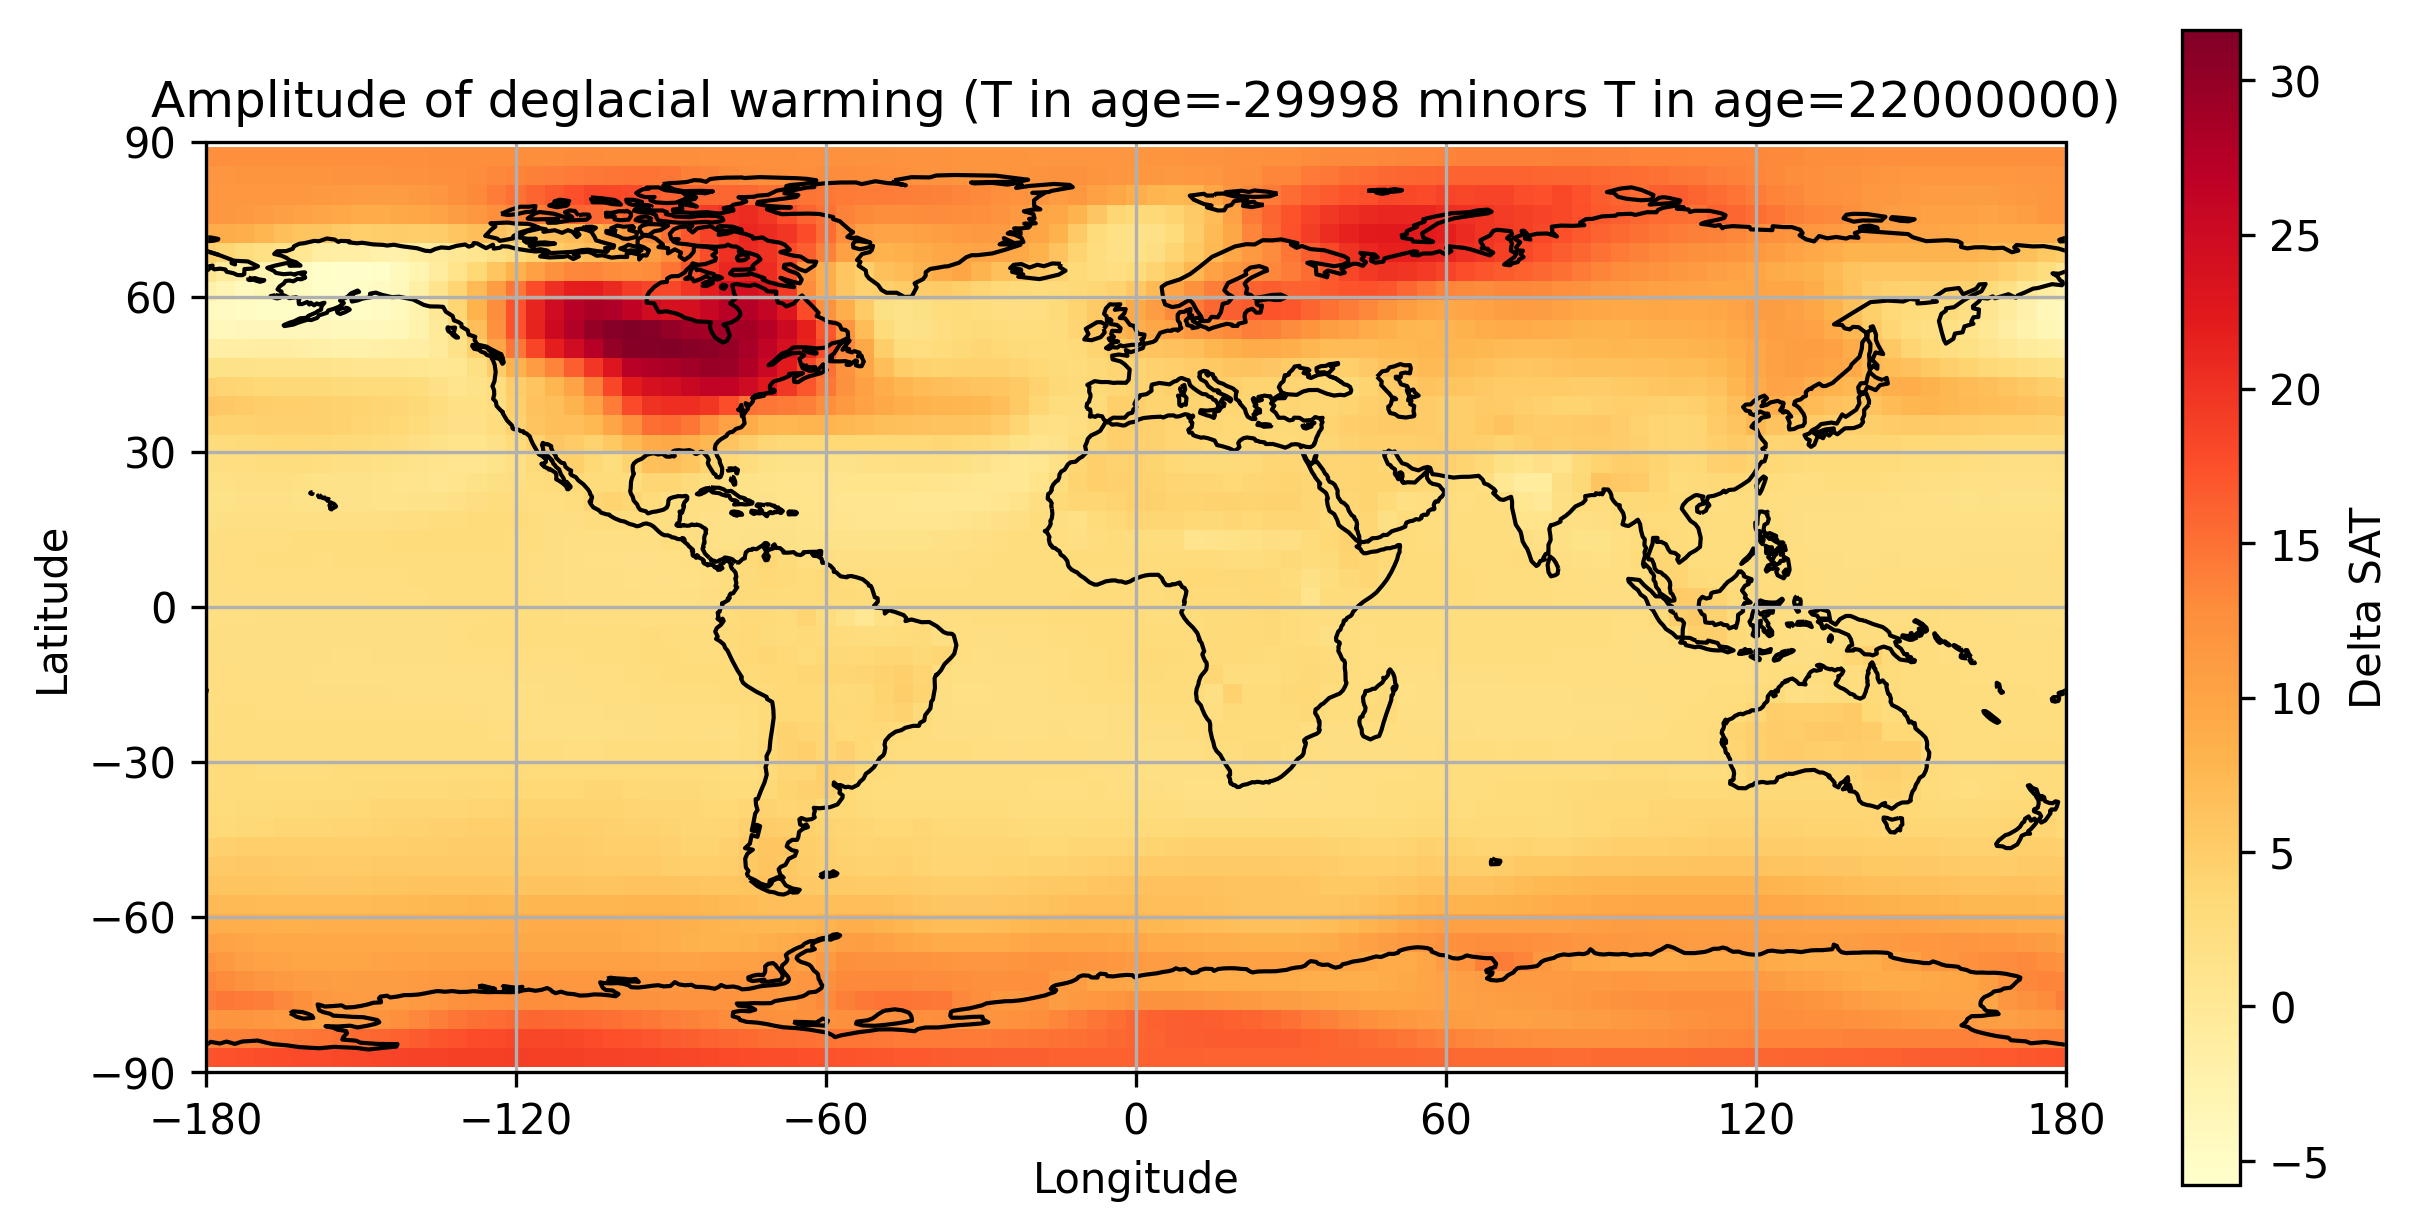

In [30]:
plot_sat(ds)

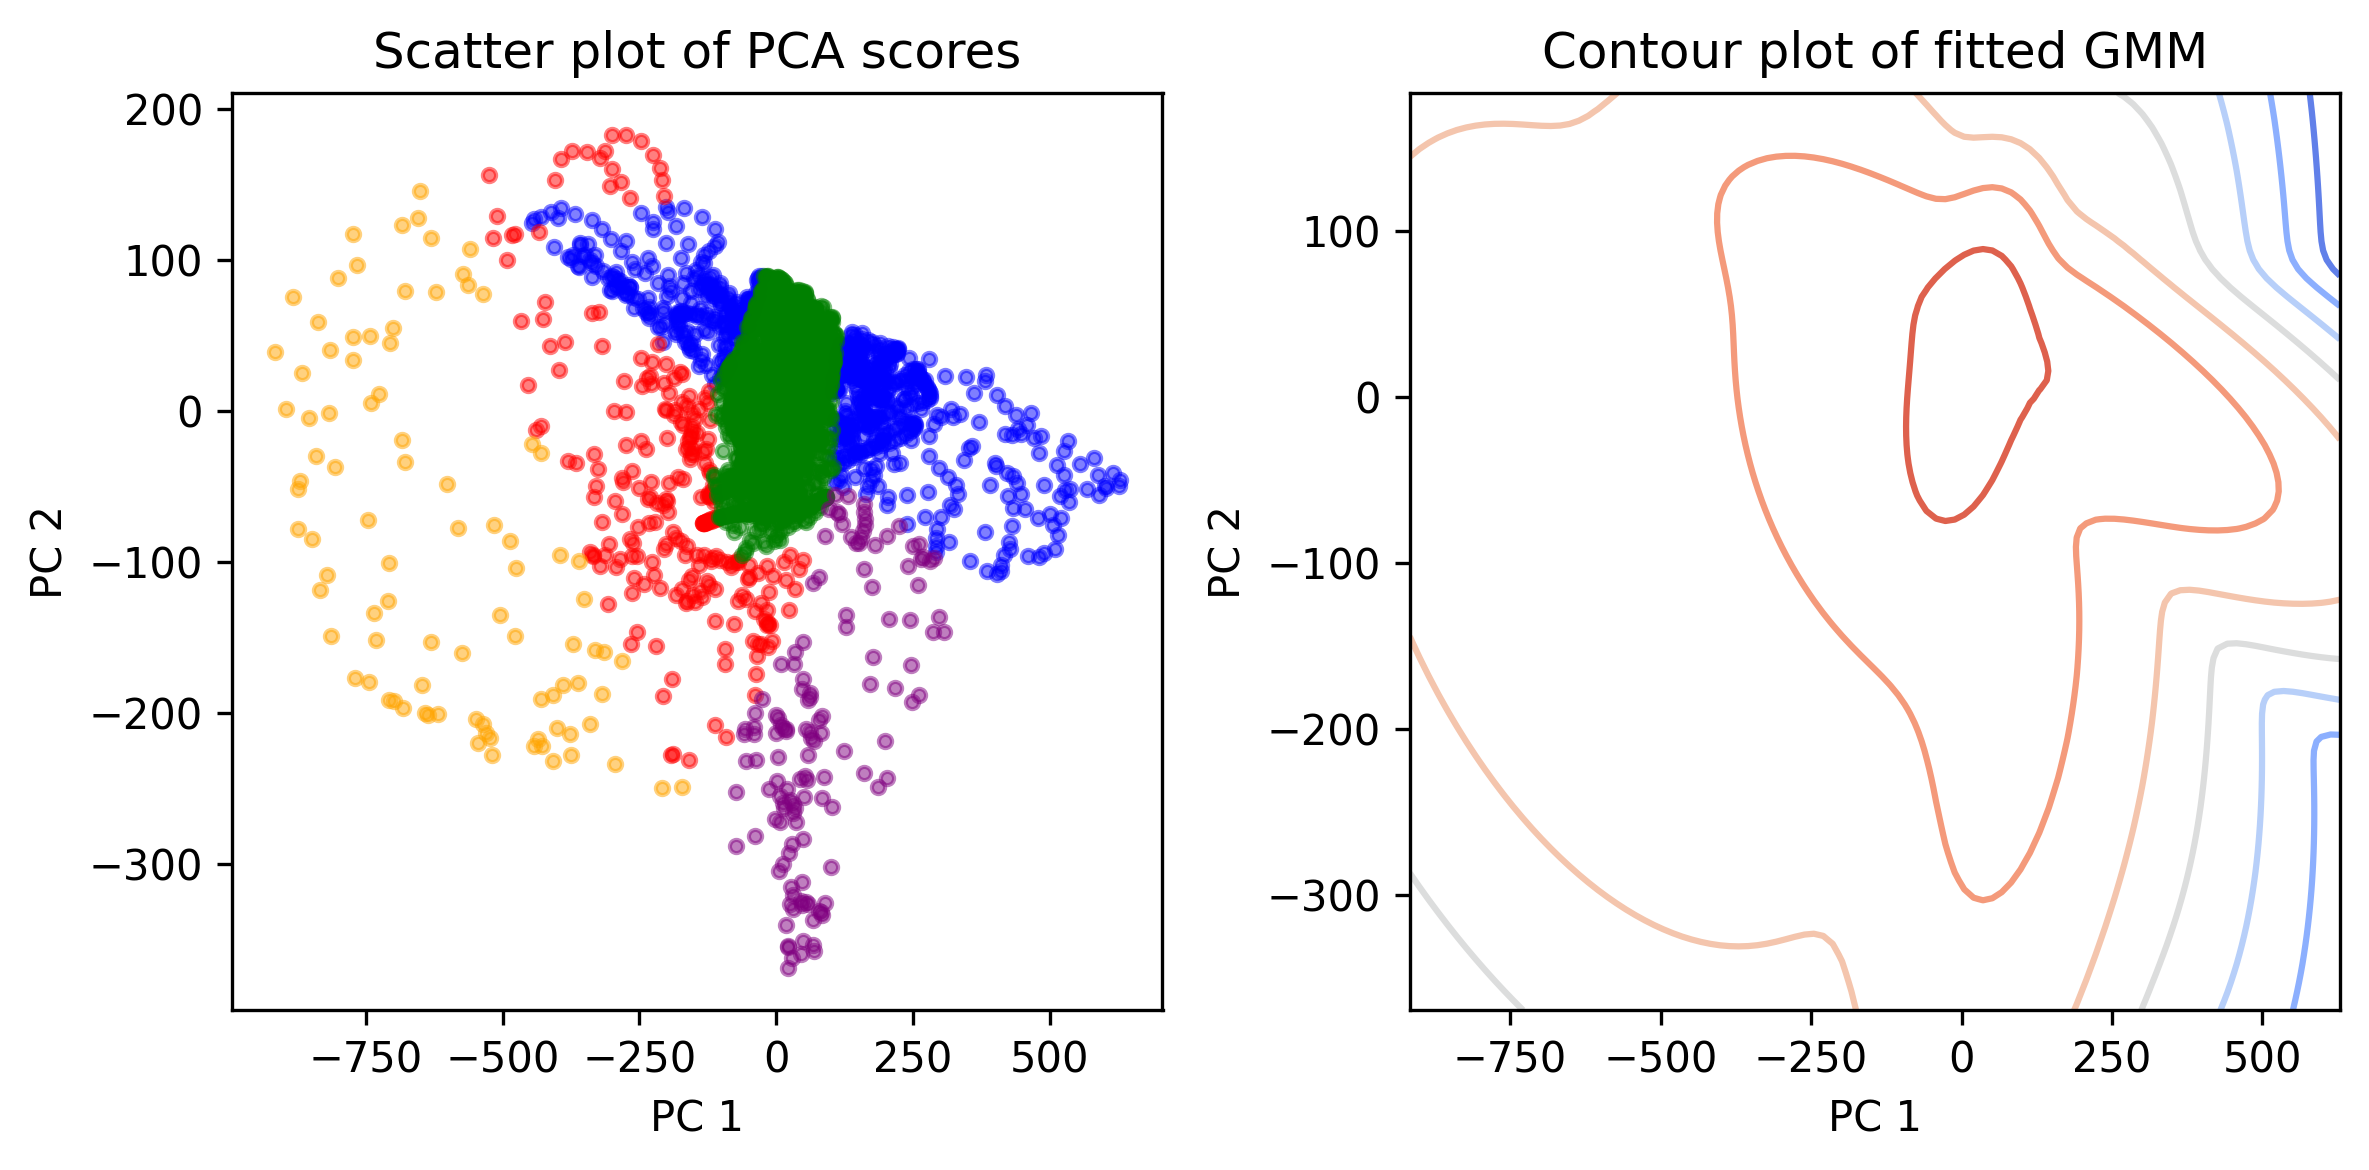

In [6]:
import GMM_functions as gf
gf.fit_gmm(ds,n_pc=2,n_components=5)

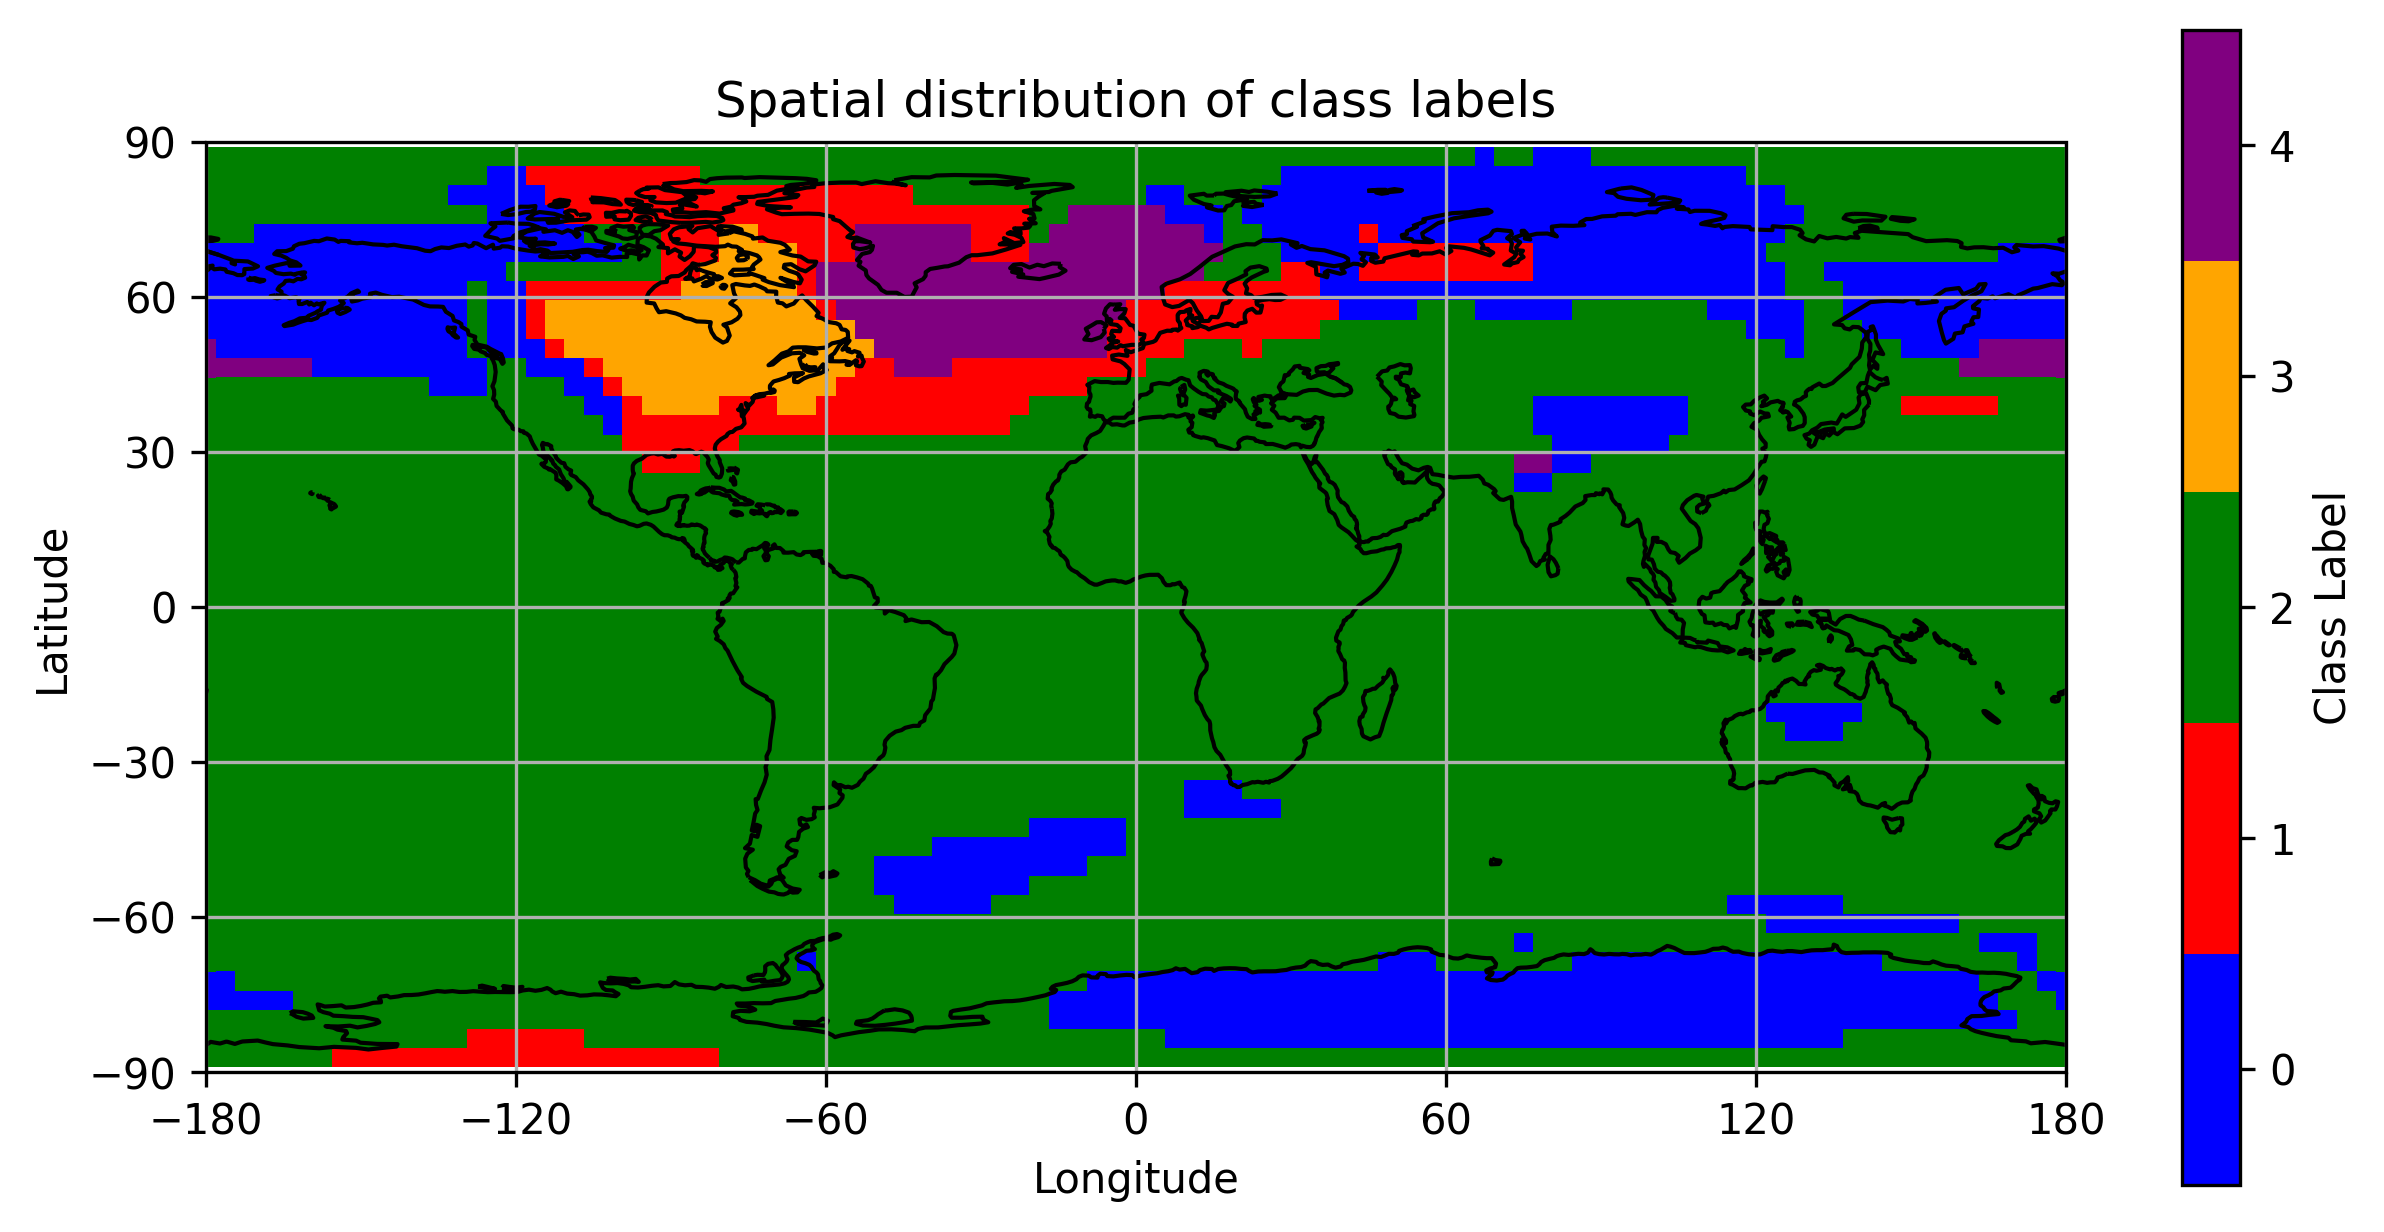

In [7]:
gf.plot_labels(ds)

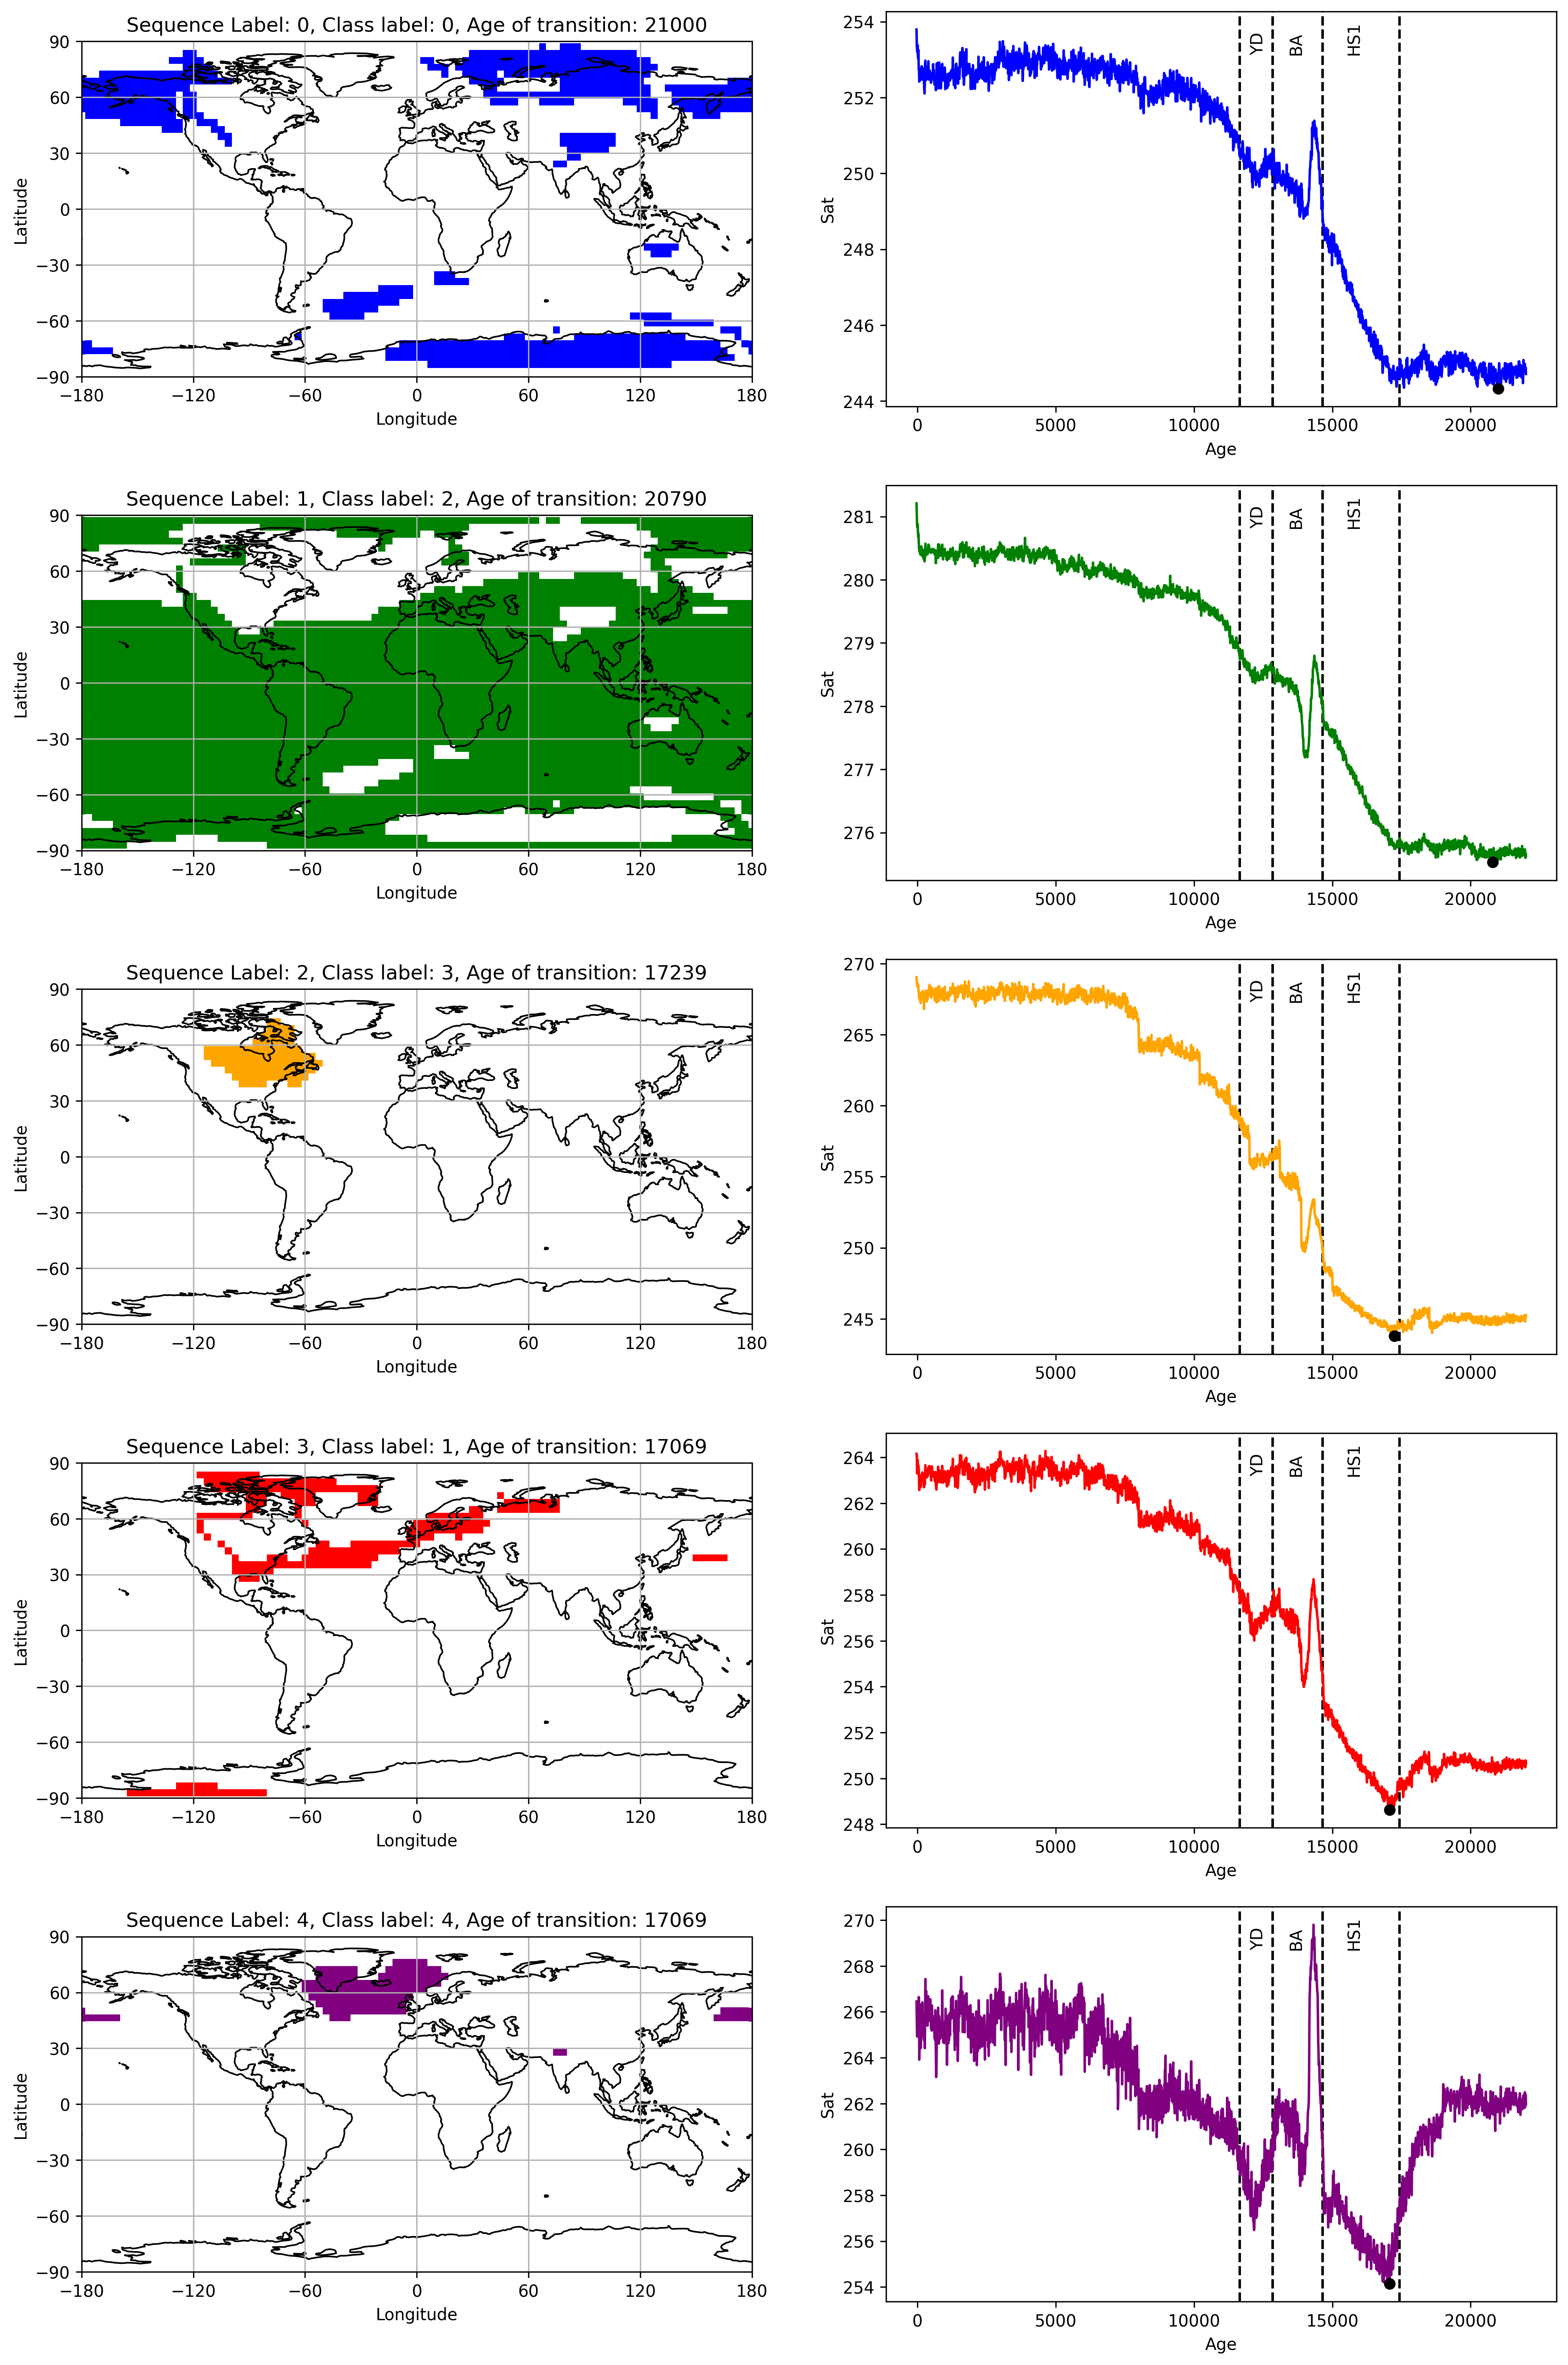

In [8]:
gf.plot_all_label_at_sequence(ds)

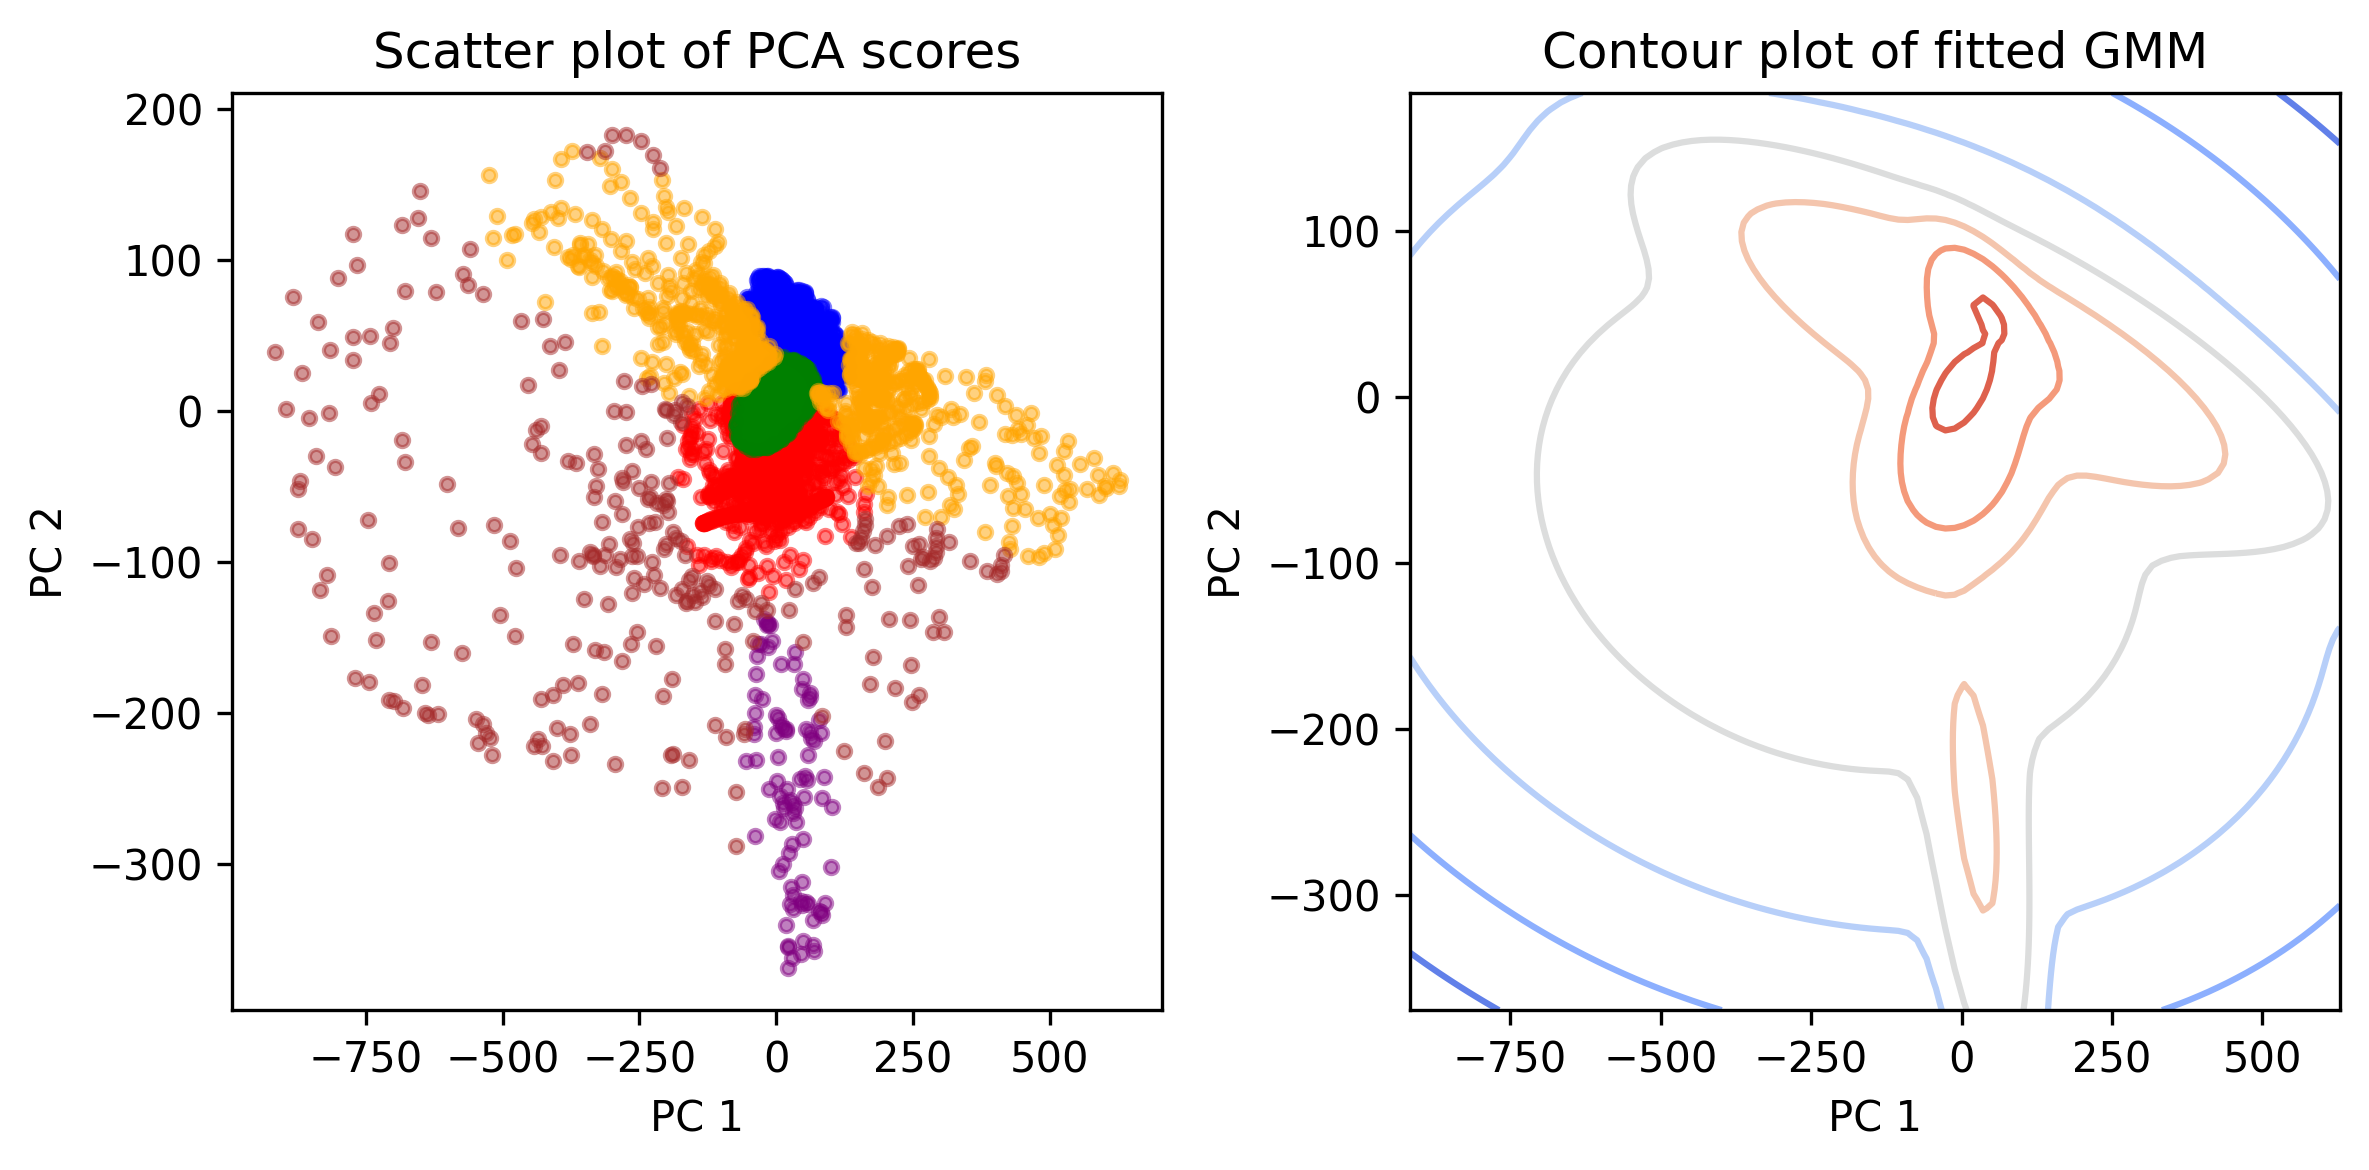

In [9]:
gf.fit_gmm(ds,n_pc=2,n_components=6)

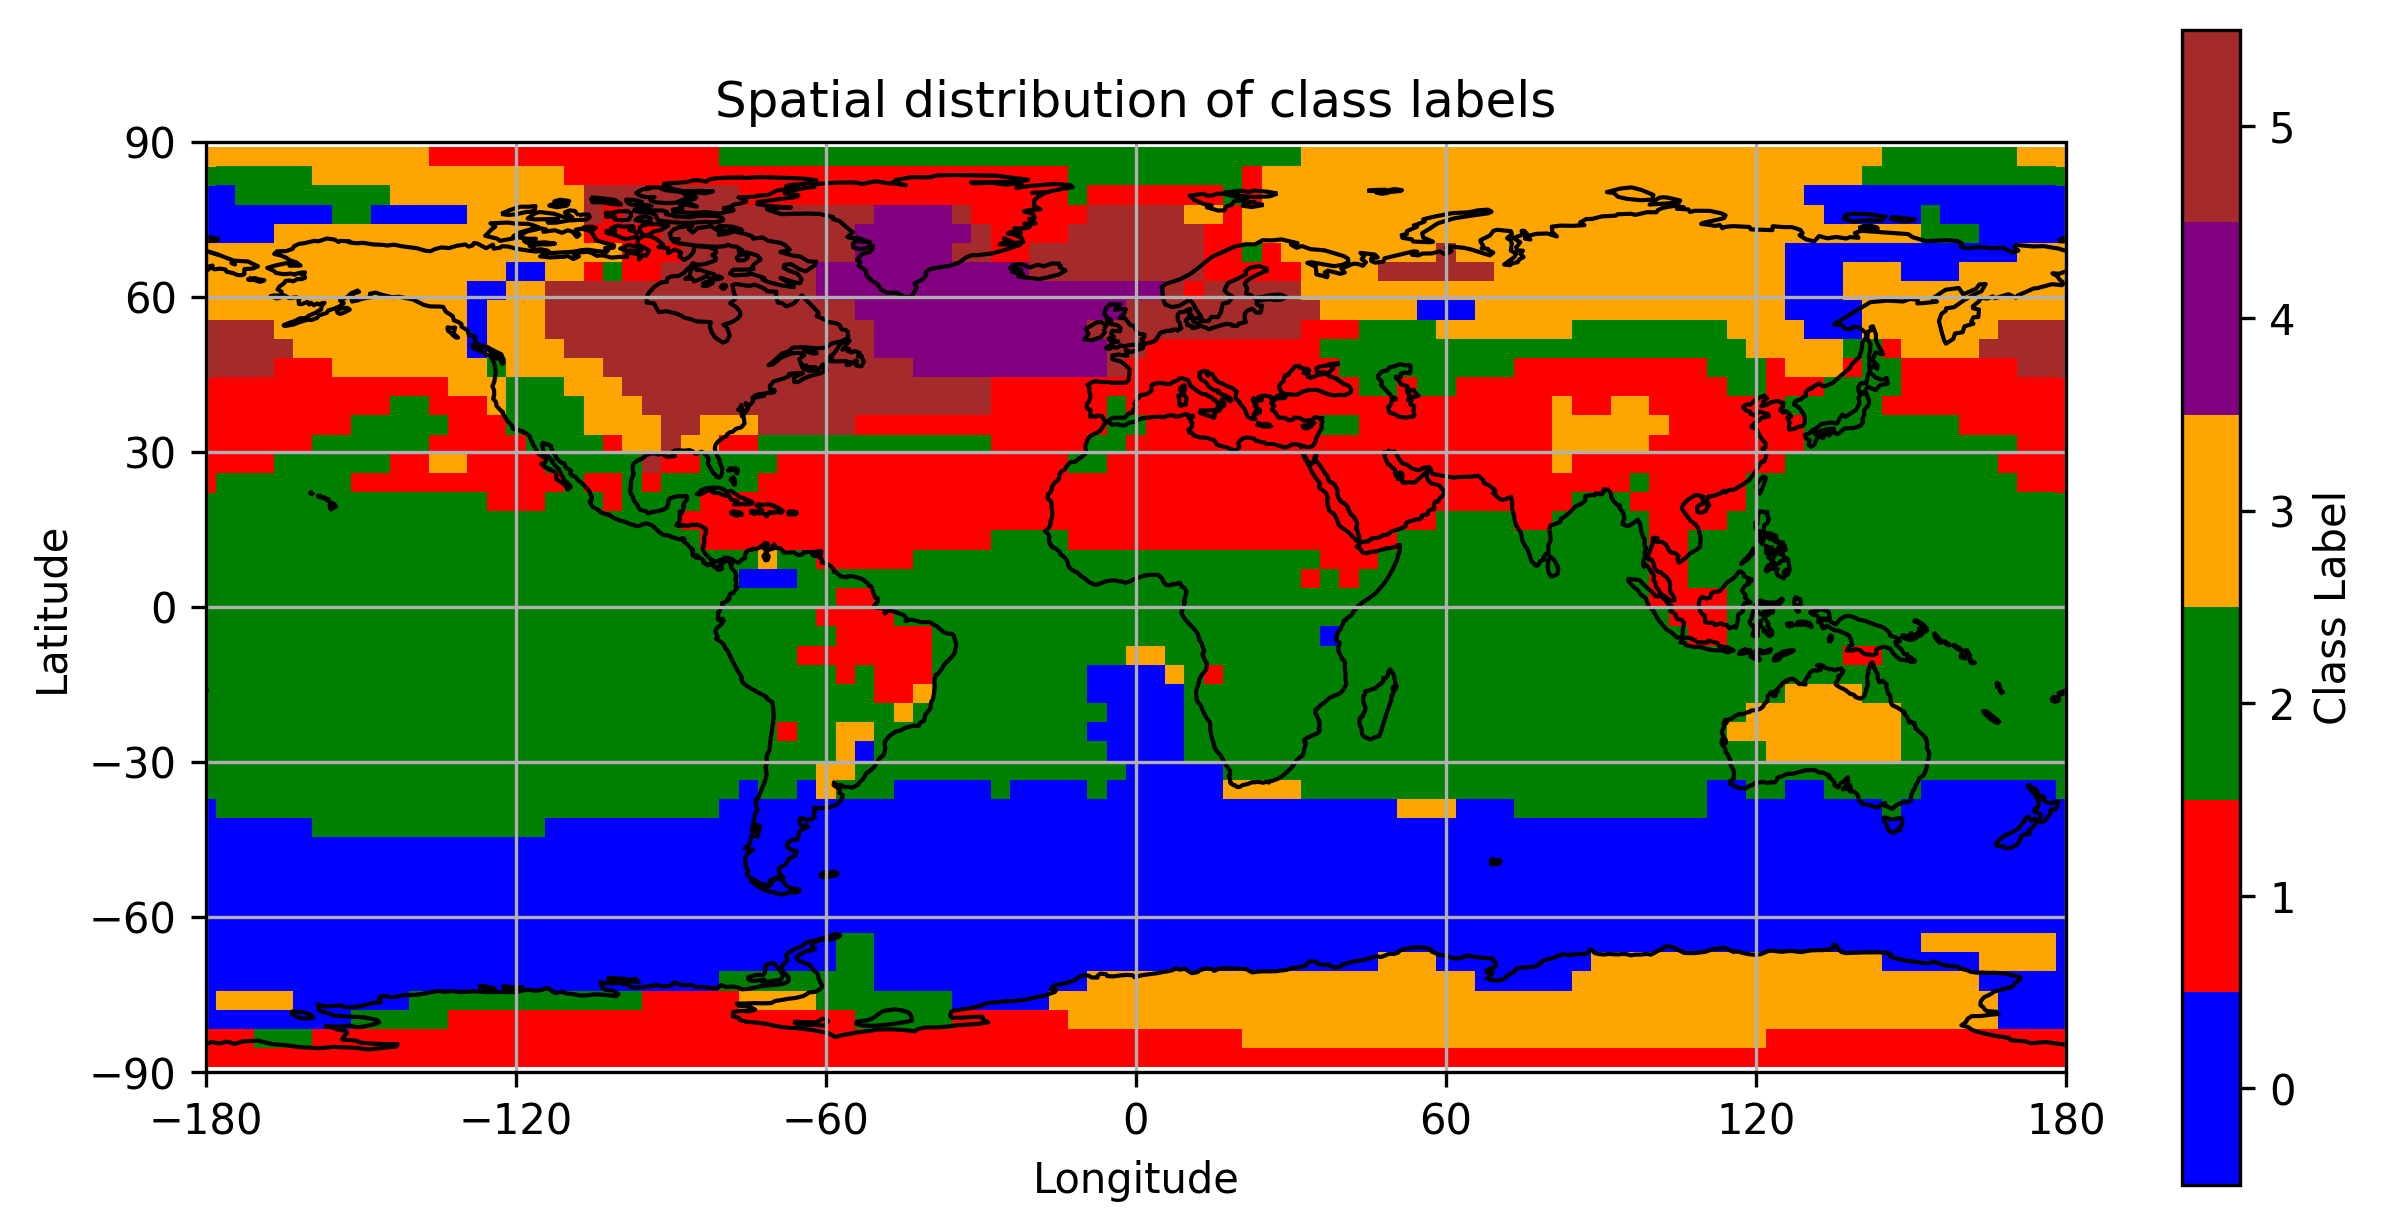

In [10]:
gf.plot_labels(ds)

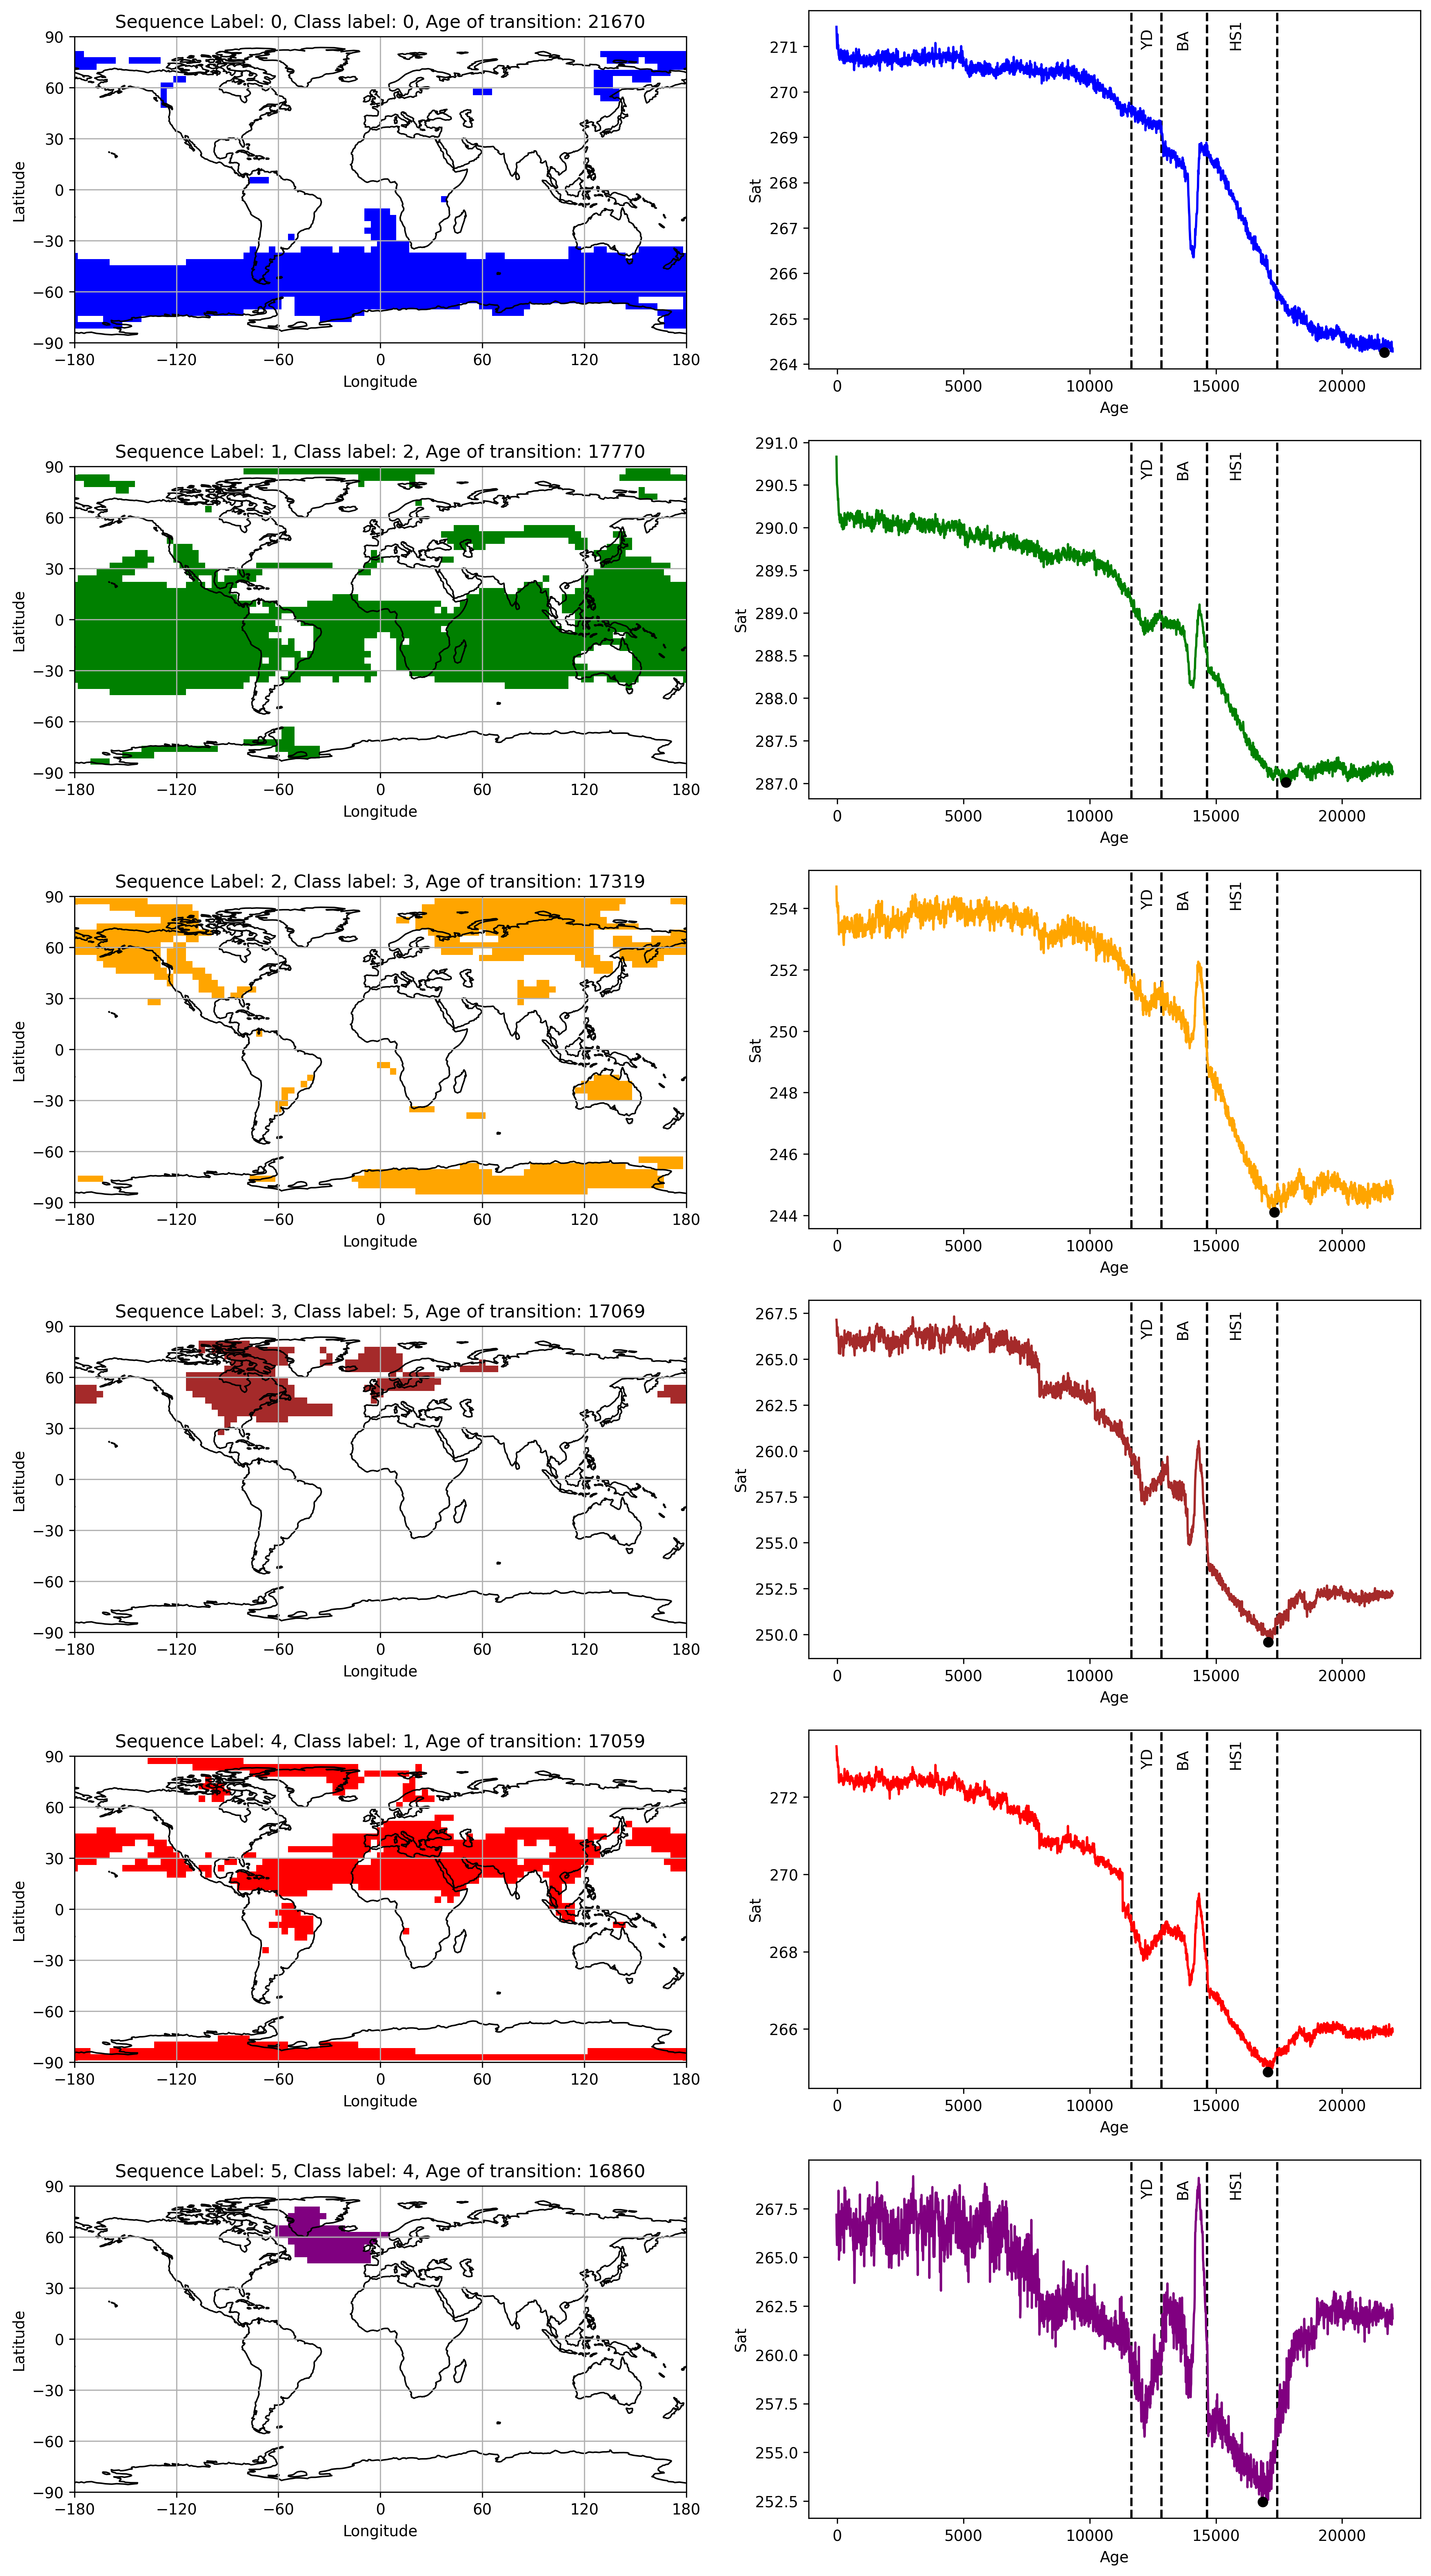

In [11]:
gf.plot_all_label_at_sequence(ds)

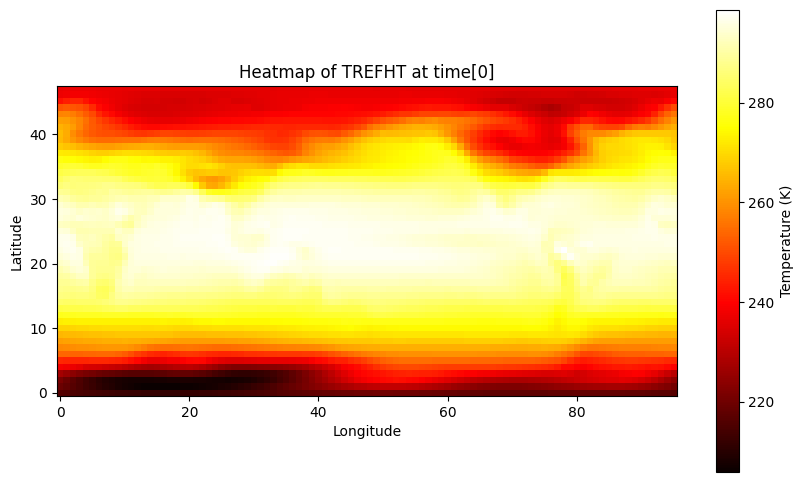

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the TREFHT data at time[0]
trefht_data = ds['TREFHT'][0]

# Convert the data to a numpy array
trefht_array = np.array(trefht_data)

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(trefht_array, cmap='hot', origin='lower')
plt.colorbar(label='Temperature (K)')
plt.title('Heatmap of TREFHT at time[0]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
